# Kosaraju's algorithm for Strongly connected components in a graph
<br/><span style="font-size: 1.3rem">What are strongly connected components?</span>
<br/><span style="font-size: 1.3rem">In a directed graph, a Strongly Connected Component is a subset of vertices where every vertex in the subset is reachable from every other vertex in the same subset by traversing the directed edges.</span>

In [2]:
import numpy as np

'''am = np.array([
    [0, 1, 0, 0, 0],
    [0, 0, 1, 1, 0],
    [1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0],
])'''
am = np.array([
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0],
])
am_t = am.transpose()

## Class for Visualization of Graphs

In [3]:
import networkx as nx 
import matplotlib.pyplot as plt 

# Defining a Class 
class GraphVisualization: 

    def __init__(self, weighted, edge_list = [], adjancency_matrix = [], isDirected = False): 
        self.weighted = weighted
        self.G = (nx.DiGraph() if isDirected else nx.Graph())
        
        if len(edge_list) > 0:
            for i in edge_list:
                self.G.add_edge(i[0], i[1], weight = i[2])
        
        elif len(adjancency_matrix) > 0:
            for i in range(len(adjancency_matrix)):
                for j in range(len(adjancency_matrix[i])):
                    if adjancency_matrix[i][j] <= 0: continue
                    self.G.add_edge(i+1, j+1, weight = adjancency_matrix[i][j])
        
        elif len(edge_list) == 0 and len(adjancency_matrix) == 0:
            raise Exception("I expect atleast an edge-list or an adjancency matrix")
    
    # In visualize function G is an object of 
    # class Graph given by networkx G.add_edges_from(visual) 
    # creates a graph with a given list 
    # nx.draw_networkx(G) - plots the graph 
    # plt.show() - displays the graph 
    def visualize(self):
        pos = nx.spring_layout(self.G, scale = 5000)

        # Manually scale up the positions for more spacing
        for key in pos:
            pos[key] *= 10000
        nx.draw_networkx(self.G, pos, node_size=700, node_color='#00ccff', font_size=10)

        if self.weighted:
            # Draw edge labels for weights
            labels = nx.get_edge_attributes(self.G, 'weight')
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.show()

## Algorithm
The algorithm steps are as follows:
- **Sort all the nodes according to their finishing time:**<br/>To sort all the nodes according to their finishing time, we will start DFS from node 0 and while backtracking in the DFS call we will store the nodes in a stack data structure. The nodes in the last SCC will finish first and will be stored in the last of the stack. After the DFS gets completed for all the nodes, the stack will be storing all the nodes in the sorted order of their finishing time.
- **Reverse all the edges of the entire graph:**<br/>Now, we will create another adjacency list and store the information of the graph in a reversed manner. For this,we can just transpose the adjacency matrix.
- **Perform the DFS and count the no. of different DFS calls to get the no. of SCC:**<br/>Now, we will start DFS from the node which is on the top of the stack and continue until the stack becomes empty. For each individual DFS call, we will increment the counter variable by 1. We will get the number of SCCs by just counting the number of individual DFS calls as in each individual DFS call, all the nodes of a particular SCC get visited.
- Finally, we will get the number of SCCs in the counter variable. If we want to store the SCCs as well, we need to store the nodes in some array during each individual DFS call in step 3.
### Note 
- The first step is to know, from which node we should start the DFS call.
- The second step is to make adjacent SCCs unreachable and to limit the DFS traversal in such a way, that in each DFS call, all the nodes of a particular SCC get visited.
- The third step is to get the numbers of the SCCs. In this step, we can also store the nodes of each SCC if we want to do so.

**Note:** *The sorting of the nodes according to their finishing time is very important. By performing this step, we will get to know where we should start our DFS calls. The top-most element of the stack will finish last and it will surely belong to the SCC1. So, the sorting step is important for the algorithm.*

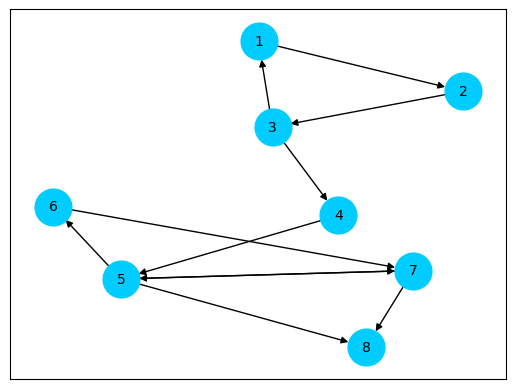

In [3]:
G1 = GraphVisualization(weighted = False, adjancency_matrix = am, isDirected = True)
G1.visualize()

## Graph with vertices reversed

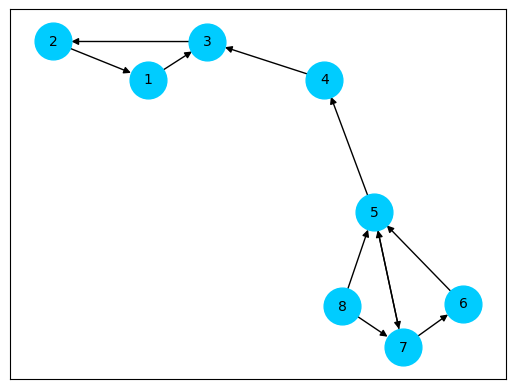

In [4]:
G2 = GraphVisualization(weighted = False, adjancency_matrix = am_t, isDirected = True)
G2.visualize()

In [5]:
class DFS:
    def __init__(self, graph, c_stack = []):
        self.graph = graph
        self.v_stack = c_stack[:]
        self.e_stack = []

    def exec(self, start = 0):
        for i in range(len(self.graph[start])):
            # for debugging
            #if self.graph[start][i] > 0: print(f"Start = {start + 1},",i + 1,"in",self.v_stack,(i + 1) in self.v_stack)
            if self.graph[start][i] > 0 and (i + 1) not in self.v_stack:
                self.v_stack.append(i + 1); self.exec(i)
        if (start + 1) in self.e_stack: self.e_stack.remove(start + 1)
        self.e_stack.append(start + 1)

### All nodes sorted according to their finishing times

In [6]:
s = DFS(am)
s.exec()
v_arr = s.e_stack[:]
v_arr

[8, 7, 6, 5, 4, 3, 2, 1]

### Keep running DFS until all nodes are accounted for

In [7]:
ccc = []

while len(v_arr) != 0:
    if len(ccc) == 0: g = DFS(am_t)
    else: g = DFS(am_t, c_stack = ccc[-1])
    g.exec(v_arr[-1] - 1)
    ccc.append(g.e_stack[:])
    for i in g.e_stack:
        if i in v_arr: v_arr.remove(i)
    # v_arr = list(set(v_arr).difference(set()))

In [8]:
ccc

[[2, 3, 1], [4], [6, 7, 5], [8]]

***